<a href="https://colab.research.google.com/github/faganvaliyev/Content/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
titanic = pd.read_csv("/content/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic.corr(numeric_only = True)['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

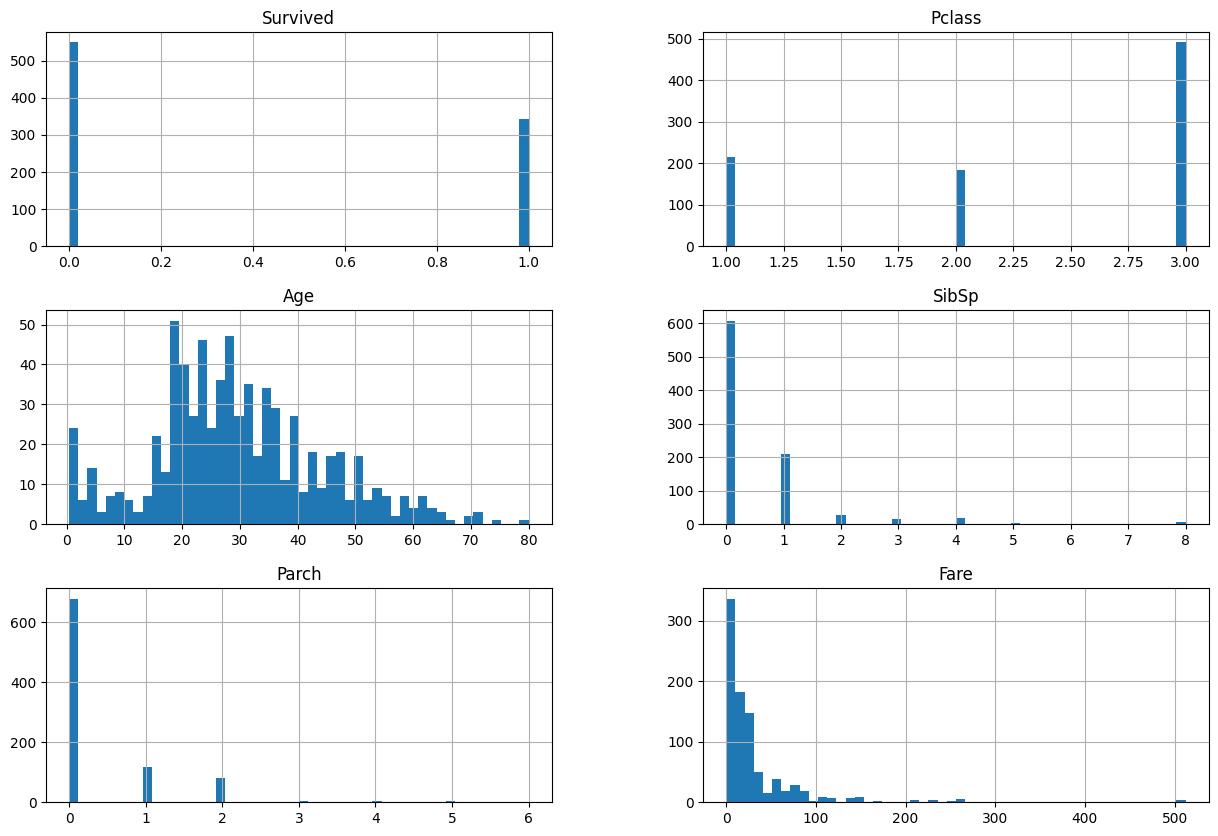

In [20]:
titanic.hist(bins=50,figsize=(15,10))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [22]:
X,y = titanic.drop("Survived", axis = 1), titanic['Survived'].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [24]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [25]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns
num_features,cat_features

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['Sex', 'Embarked'], dtype='object'))

In [26]:
cat_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('one_hot',OneHotEncoder(handle_unknown = 'ignore'))
])

num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

transformer=ColumnTransformer([
    ('cat_pipeline',cat_pipeline,cat_features),
    ('num_pipeline',num_pipeline,num_features)
])

In [27]:
full_pipeline = Pipeline([
    ('preprocess', transformer),
    ('rfr', RandomForestClassifier())
])

In [28]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Sex', 'Embarked'], dtype='object')),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                ('rfr', RandomForestClassifier())])

In [29]:
full_pipeline.score(X_train,y_train) ,full_pipeline.score(X_test,y_test)

(0.9803370786516854, 0.8100558659217877)

In [33]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
param_grid = {
    'rfr__n_estimators': [150, 180, 200],
    'rfr__max_depth': [12, 15, 20],
    'rfr__min_samples_split': [15, 19, 24],
    'rfr__min_samples_leaf': [1, 2, 3],
    'rfr__max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Sex', 'Embarked'], dtype='object')),
                                                                        ('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                                       ('rfr', RandomForestClassifier())]),
             param_grid={'rfr__max_depth': [12, 15, 20],
                         'rfr__max_features': ['sqrt', 'log2'],
                         'rfr__min_samples_leaf': [1, 2, 3],
                         'rfr__min_samples_split': [15, 19, 24],
                         'rfr__n_estimators': [150, 180, 200]},
             scoring='accuracy')

In [34]:
best_params = grid_search.best_params_
best_params

{'rfr__max_depth': 12,
 'rfr__max_features': 'log2',
 'rfr__min_samples_leaf': 3,
 'rfr__min_samples_split': 24,
 'rfr__n_estimators': 200}

In [35]:
grid_search.best_estimator_.score(X_train,y_train),grid_search.best_estimator_.score(X_test,y_test)

(0.8525280898876404, 0.7988826815642458)